## Assessing the strength of user input password using Natural Language Processsing

The project consists of classifying user input password as being strong, weak or medium using dataset from facebook  

## Data

the dataset consist of :

    password: continuous
    strength: discrete

## Problem Statement:
The final goal is established whether the user password has a good strength, average or weak strenght.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv("training.csv", error_bad_lines=False)
df.head()

,index,password,strength
0,0,kzde5577,1
1,1,kino3434,1
2,2,visi7k1yr,1
3,3,megzy123,1
4,4,lamborghin1,1


In [3]:
df.drop('index', axis=1, inplace=True)

In [4]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [5]:
df['strength'].unique()

array([1, 2, 0])

In [8]:
df.isna().sum()

password    1
strength    0
dtype: int64

In [10]:
df[df['password'].isnull()]

,password,strength
367439,NaN,0


In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

password    0
strength    0
dtype: int64

<AxesSubplot:xlabel='strength', ylabel='count'>

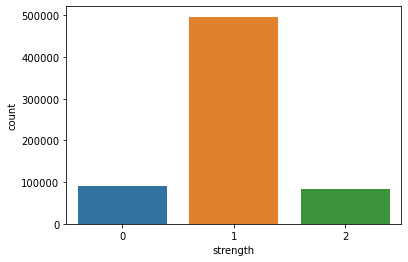

In [14]:
sns.countplot(df['strength'])

distribution of password in the datase on strength

There are more password with strength level of 1

In [15]:
password_tuple = np.array(df)

In [16]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [17]:
import random
random.shuffle(password_tuple)

In [18]:
X = [labels[0] for labels in password_tuple]
y = [labels[1] for labels in password_tuple]

In [19]:
# split words into  characters

def word_divide_char(inputs):
    character = []
    for i in inputs:
        character.append(i)
    return character

In [21]:
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
vectorizer = TfidfVectorizer(tokenizer=word_divide_char)

In [25]:
X = vectorizer.fit_transform(X)
X.shape

(669423, 132)

In [26]:
vectorizer.get_feature_names()

['\x01',
 '\x05',
 '\x08',
 '\x10',
 '\x13',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1d',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x81',
 '\x8d',
 '\xa0',
 '¡',
 '¨',
 '«',
 '¯',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '¹',
 'º',
 '¾',
 '¿',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'ê',
 'í',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 'œ',
 '—',
 '‚',
 '‡',
 '…',
 '‹',
 '›']

In [27]:
first_document_vector = X[0]
first_document_vector

<1x132 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [28]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.5673027 ],
        [0.        ],
        [0.59200566],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

data importance with respect to each feature

In [30]:
df = pd.DataFrame(first_document_vector.T.todense(), vectorizer.get_feature_names(), columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'], ascending=False)

,TF-IDF
7,0.592006
5,0.567303
z,0.335001
k,0.291479
d,0.285743
...,...
>,0.000000
=,0.000000
<,0.000000
;,0.000000


first col represents the data, and second represents the importance

### Splitting the Data into Train and Test Set

In [31]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape

(535538, 132)

# Model Building

## Logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, multi_class='multinomial')

In [33]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [34]:
dt = np.array(['pwd#()!@#$%^&*()_+'])
pred = vectorizer.transform(dt)
clf.predict(pred)

array([2])

In [35]:
y_pred  = clf.predict(X_test)
y_pred

array([1, 2, 1, ..., 1, 1, 1])

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\n')
print(accuracy_score(y_test, y_pred))

[[ 5274 12735    15]
 [ 3698 92881  2640]
 [   40  5190 11412]]


0.8183665085707884


In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.29      0.39     18024
           1       0.84      0.94      0.88     99219
           2       0.81      0.69      0.74     16642

    accuracy                           0.82    133885
   macro avg       0.74      0.64      0.67    133885
weighted avg       0.80      0.82      0.80    133885



## Conclusion

This project help us deal with tex data